In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
plt.rcParams['font.family']=['Heiti TC']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=(20,10)

In [106]:
catering_sale='tutorial/chapter3/demo/data/catering_sale.xls'

In [107]:
data=pd.read_excel(catering_sale,index_col='日期')

In [108]:
data.describe()

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


In [51]:
data.head()

,销量
日期,
2015-03-01,51.0
2015-02-28,2618.2
2015-02-27,2608.4
2015-02-26,2651.9
2015-02-25,3442.1


In [10]:
data.isna().any()

销量    True
dtype: bool

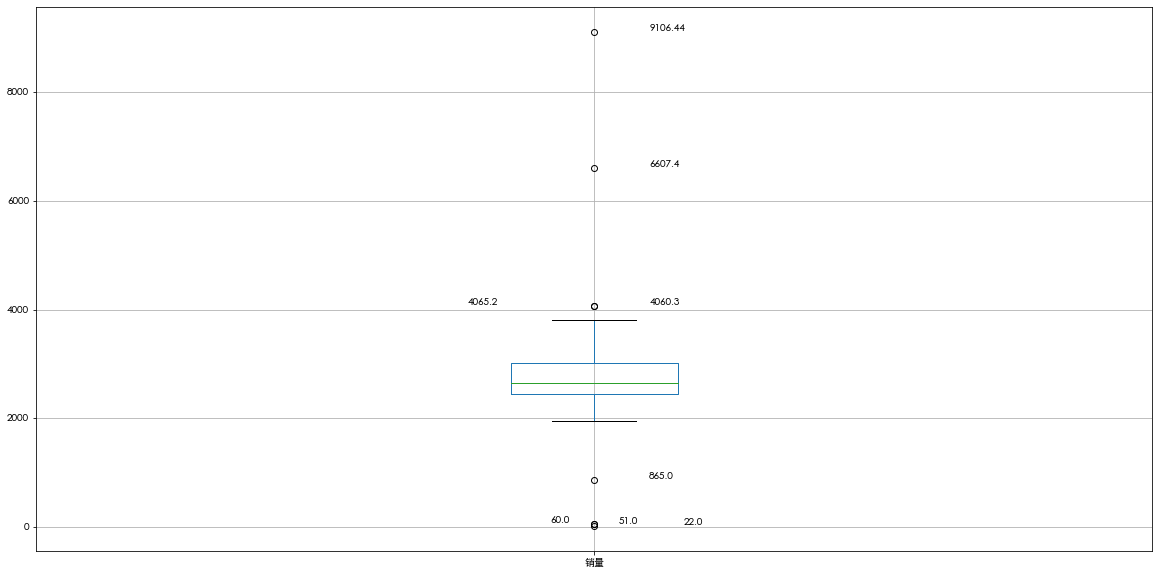

In [40]:
plt.figure()
p=data.boxplot(return_type='dict')
x=p['fliers'][0].get_xdata()
y=p['fliers'][0].get_ydata()
y.sort()
for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i],xy=(x[i],y[i]), xytext=(x[i]+0.05-0.8/(y[i]-y[i-1]),y[i]))
    else:
        plt.annotate(y[i],xy=(x[i],y[i]), xytext=(x[i]+0.08,y[i]))
plt.show()

In [109]:
catering_sale='tutorial/chapter3/demo/data/catering_fish_congee.xls'
data = pd.read_excel(catering_sale,names=['date','sale'])

In [110]:
data.describe()

,sale
count,90.000000
mean,1241.333333
std,941.317843
min,45.000000
25%,420.000000
50%,900.000000
75%,1792.500000
max,3960.000000


In [55]:
data.head()

,date,sale
0,2014-04-02,900
1,2014-04-03,1290
2,2014-04-04,420
3,2014-04-05,1710
4,2014-04-06,1290


In [57]:
type(data.sale[0])

numpy.int64

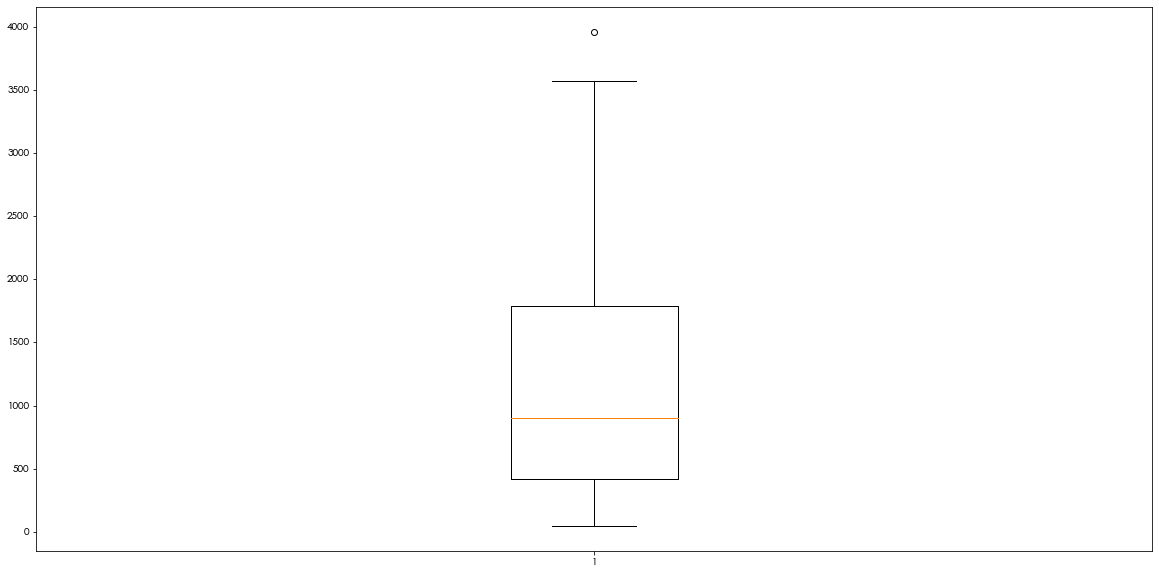

In [62]:
res=plt.boxplot(data.sale,showfliers=True)
plt.show()

In [64]:
x=res['fliers'][0].get_xdata()
y=res['fliers'][0].get_ydata()

In [65]:
y

array([3960])

<AxesSubplot:>

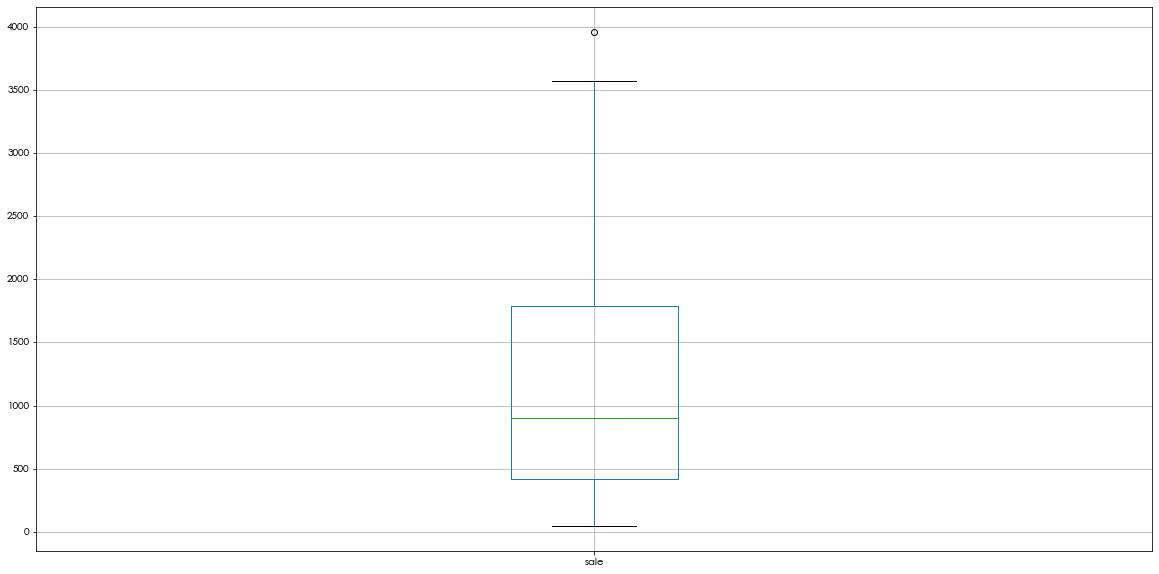

In [66]:
data.boxplot()

In [67]:
bins=[i*500 for i in range(9)]

In [71]:
labels=['[{},{})'.format(bins[i],bins[i+1]) for i in range(len(bins)-1)]

In [83]:
data['sale_seg']=pd.cut(data.sale,bins,labels=labels)

In [84]:
data.head()

,date,sale,sale_seg
0,2014-04-02,900,"[500,1000)"
1,2014-04-03,1290,"[1000,1500)"
2,2014-04-04,420,"[0,500)"
3,2014-04-05,1710,"[1500,2000)"
4,2014-04-06,1290,"[1000,1500)"


In [86]:
aggResult =data.groupby(by=['sale_seg']).agg({'sale': np.size})

In [91]:
paggResult=round(aggResult/aggResult.sum(),2,)*100

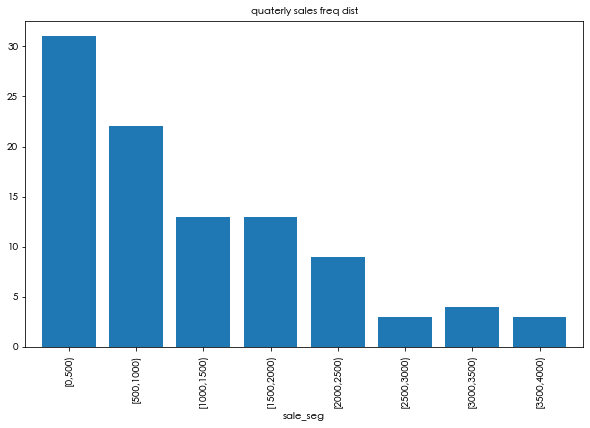

In [95]:
plt.figure(figsize=(10,6))
paggResult['sale'].plot(kind='bar',width=0.8,fontsize=10)
plt.title('quaterly sales freq dist',fontsize=10)
plt.show()

In [111]:
catering_dish_profit='tutorial/chapter3/demo/data/catering_dish_profit.xls'
data=pd.read_excel(catering_dish_profit)

In [112]:
data.head()

,菜品ID,菜品名,盈利
0,17148,A1,9173
1,17154,A2,5729
2,109,A3,4811
3,117,A4,3594
4,17151,A5,3195


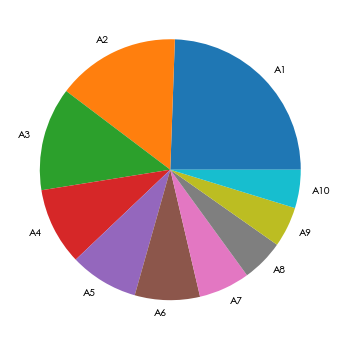

In [113]:
x=data['盈利']
labels=data['菜品名']
plt.figure(figsize=(8,6))
plt.pie(x,labels=labels)
plt.show()

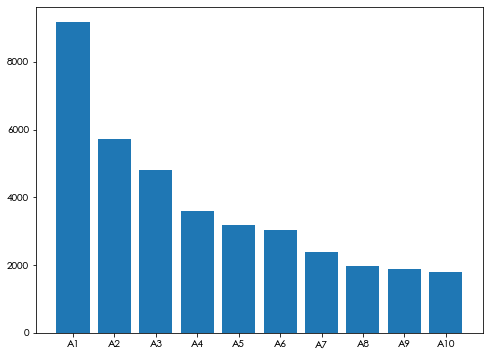

In [99]:
y=data['盈利']
x=data['菜品名']
plt.figure(figsize=(8,6))
plt.bar(x,y)
plt.show()

In [116]:
data=pd.read_excel('tutorial/chapter3/demo/data/dish_sale.xls')

In [117]:
data.head()

,月份,A部门,B部门,C部门
0,1月,8.00,7.7,5.3
1,2月,6.00,6.5,5.2
2,3月,6.89,7.9,5.8
3,4月,6.10,7.5,6.2
4,5月,6.05,8.0,5.9


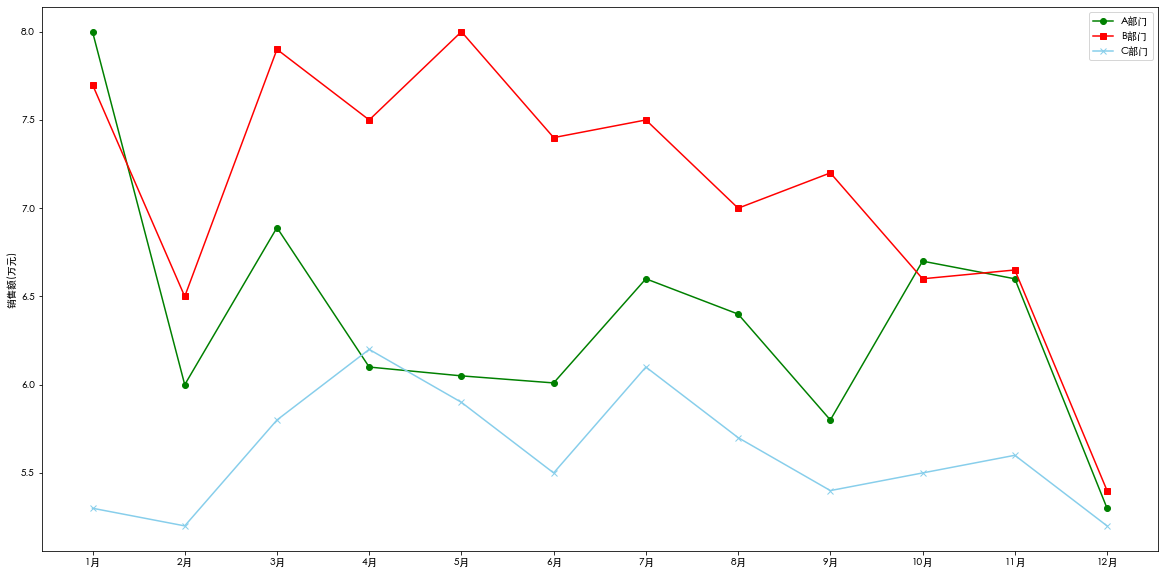

In [120]:
plt.plot(data['月份'],data['A部门'],color='green',label='A部门',marker='o')
plt.plot(data['月份'],data['B部门'],color='red',label='B部门',marker='s')
plt.plot(data['月份'],data['C部门'],color='skyblue',label='C部门',marker='x')
plt.legend()
plt.ylabel('销售额(万元)')
plt.show()

In [122]:
data=pd.read_excel('tutorial/chapter3/demo/data/dish_sale_b.xls')

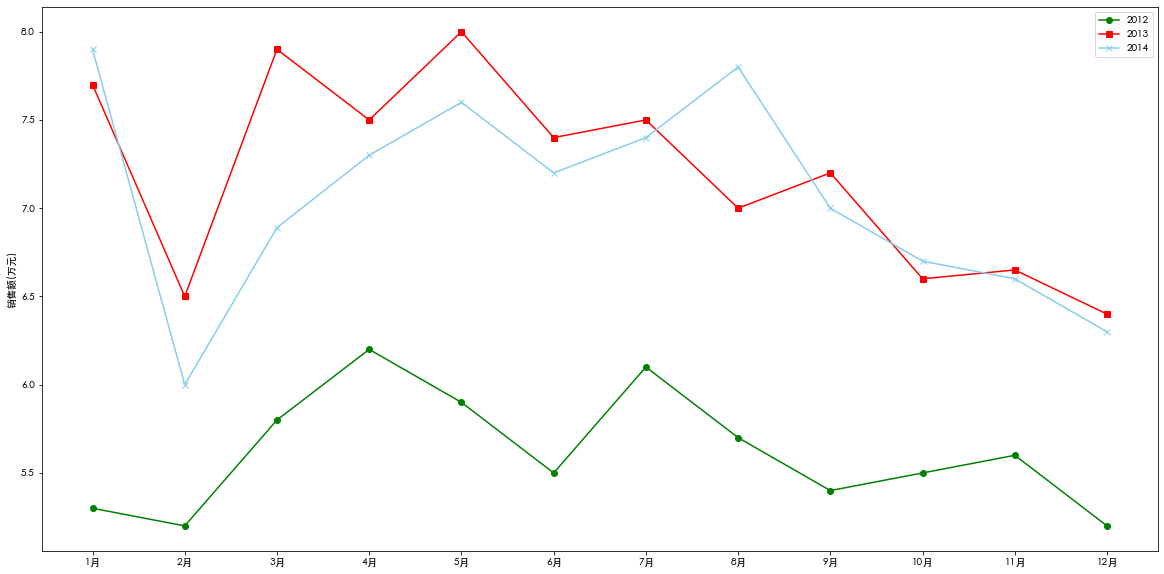

In [124]:
plt.plot(data['月份'],data['2012年'],color='green',label='2012',marker='o')
plt.plot(data['月份'],data['2013年'],color='red',label='2013',marker='s')
plt.plot(data['月份'],data['2014年'],color='skyblue',label='2014',marker='x')
plt.legend()
plt.ylabel('销售额(万元)')
plt.show()

In [125]:
catering_sale='tutorial/chapter3/demo/data/catering_sale.xls'
data=pd.read_excel(catering_sale,index_col='日期')

In [131]:
data=data[(data['销量']>400)&(data['销量'] < 5000)]
stat=data.describe()
stat.loc['range']=stat.loc['max']-stat.loc['min']
stat.loc['var']=stat.loc['std']/stat.loc['mean']
stat.loc['dis']=stat.loc['75%']-stat.loc['25%']

In [132]:
print(stat)

                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
range  3200.200000
var       0.154755
dis     562.600000


<AxesSubplot:>

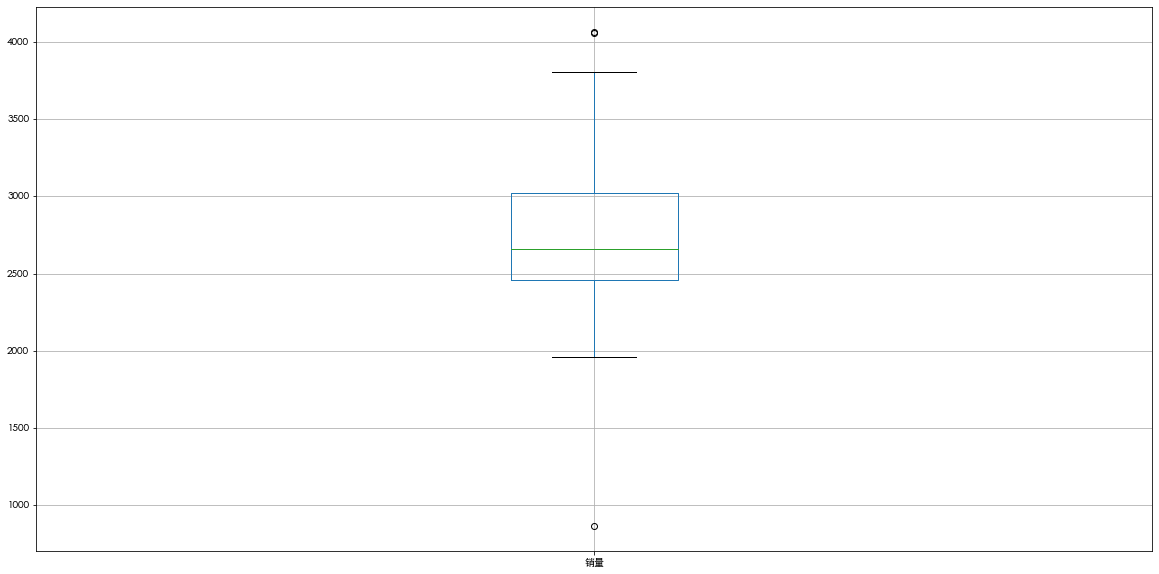

In [128]:
data.boxplot()

In [133]:
dish_profit='tutorial/chapter3/demo/data/catering_dish_profit.xls'
data=pd.read_excel(dish_profit)

In [134]:
data.head()

,菜品ID,菜品名,盈利
0,17148,A1,9173
1,17154,A2,5729
2,109,A3,4811
3,117,A4,3594
4,17151,A5,3195


In [136]:
profit=data['盈利'].copy()
profit.sort_values(ascending=False,inplace=True)

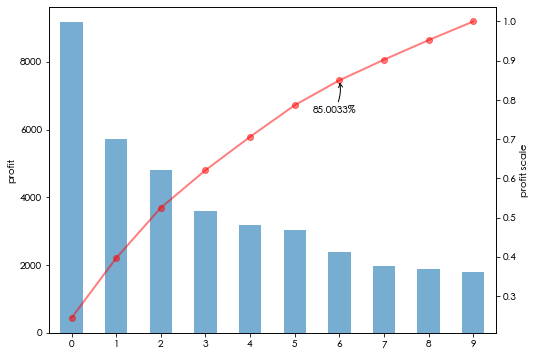

In [151]:
plt.figure(figsize=(8,6))
profit.plot(kind='bar',alpha=0.6)
plt.ylabel('profit')
p=1.0*profit.cumsum()/profit.sum()
p.plot(color='r',secondary_y=True,style='-o',linewidth=2,alpha=0.5)
plt.ylabel('profit scale')
plt.annotate(format(p[6],'.4%'),xy=(6,p[6]),xytext=(6*0.9,p[6]*0.9),arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2"))
plt.show()

In [152]:
catering_sale='tutorial/chapter3/demo/data/catering_sale_all.xls'
data=pd.read_excel(catering_sale)

In [153]:
data.describe()

,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
count,29.000000,29.000000,29.000000,29.000000,28.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,8.172414,8.551724,9.896552,10.206897,8.535714,8.827586,9.862069,9.689655,9.172414,10.517241
std,3.196750,2.720113,3.004102,4.608837,2.603163,3.000821,4.290556,2.941130,2.829298,4.314599
min,3.000000,5.000000,4.000000,3.000000,4.000000,3.000000,1.000000,5.000000,3.000000,4.000000
25%,6.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,9.000000
50%,8.000000,8.000000,11.000000,9.000000,8.000000,9.000000,9.000000,10.000000,10.000000,10.000000
75%,10.000000,10.000000,12.000000,13.000000,10.250000,11.000000,13.000000,12.000000,11.000000,13.000000
max,17.000000,15.000000,14.000000,24.000000,14.000000,15.000000,19.000000,16.000000,14.000000,27.000000


In [154]:
print(data.corr())

           百合酱蒸凤爪    翡翠蒸香茜饺   金银蒜汁蒸排骨     乐膳真味鸡     蜜汁焗餐包      生炒菜心    铁板酸菜豆腐  \
百合酱蒸凤爪   1.000000  0.009206  0.016799  0.455638  0.098085  0.308496  0.204898   
翡翠蒸香茜饺   0.009206  1.000000  0.304434 -0.012279  0.058745 -0.180446 -0.026908   
金银蒜汁蒸排骨  0.016799  0.304434  1.000000  0.035135  0.096218 -0.184290  0.187272   
乐膳真味鸡    0.455638 -0.012279  0.035135  1.000000  0.016006  0.325462  0.297692   
蜜汁焗餐包    0.098085  0.058745  0.096218  0.016006  1.000000  0.308454  0.502025   
生炒菜心     0.308496 -0.180446 -0.184290  0.325462  0.308454  1.000000  0.369787   
铁板酸菜豆腐   0.204898 -0.026908  0.187272  0.297692  0.502025  0.369787  1.000000   
香煎韭菜饺    0.127448  0.062344  0.121543 -0.068866  0.155428  0.038233  0.095543   
香煎罗卜糕   -0.090276  0.270276  0.077808 -0.030222  0.171005  0.049898  0.157958   
原汁原味菜心   0.428316  0.020462  0.029074  0.421878  0.527844  0.122988  0.567332   

            香煎韭菜饺     香煎罗卜糕    原汁原味菜心  
百合酱蒸凤爪   0.127448 -0.090276  0.428316  
翡翠蒸香茜饺   0.062344  0.270276 

In [155]:
print(data.corr()['百合酱蒸凤爪'])

百合酱蒸凤爪     1.000000
翡翠蒸香茜饺     0.009206
金银蒜汁蒸排骨    0.016799
乐膳真味鸡      0.455638
蜜汁焗餐包      0.098085
生炒菜心       0.308496
铁板酸菜豆腐     0.204898
香煎韭菜饺      0.127448
香煎罗卜糕     -0.090276
原汁原味菜心     0.428316
Name: 百合酱蒸凤爪, dtype: float64


In [157]:
d=pd.Series(range(0,20))
print(d.cumsum()/d.sum())
print(d.rolling(2).sum())

0     0.000000
1     0.005263
2     0.015789
3     0.031579
4     0.052632
5     0.078947
6     0.110526
7     0.147368
8     0.189474
9     0.236842
10    0.289474
11    0.347368
12    0.410526
13    0.478947
14    0.552632
15    0.631579
16    0.715789
17    0.805263
18    0.900000
19    1.000000
dtype: float64
0      NaN
1      1.0
2      3.0
3      5.0
4      7.0
5      9.0
6     11.0
7     13.0
8     15.0
9     17.0
10    19.0
11    21.0
12    23.0
13    25.0
14    27.0
15    29.0
16    31.0
17    33.0
18    35.0
19    37.0
dtype: float64


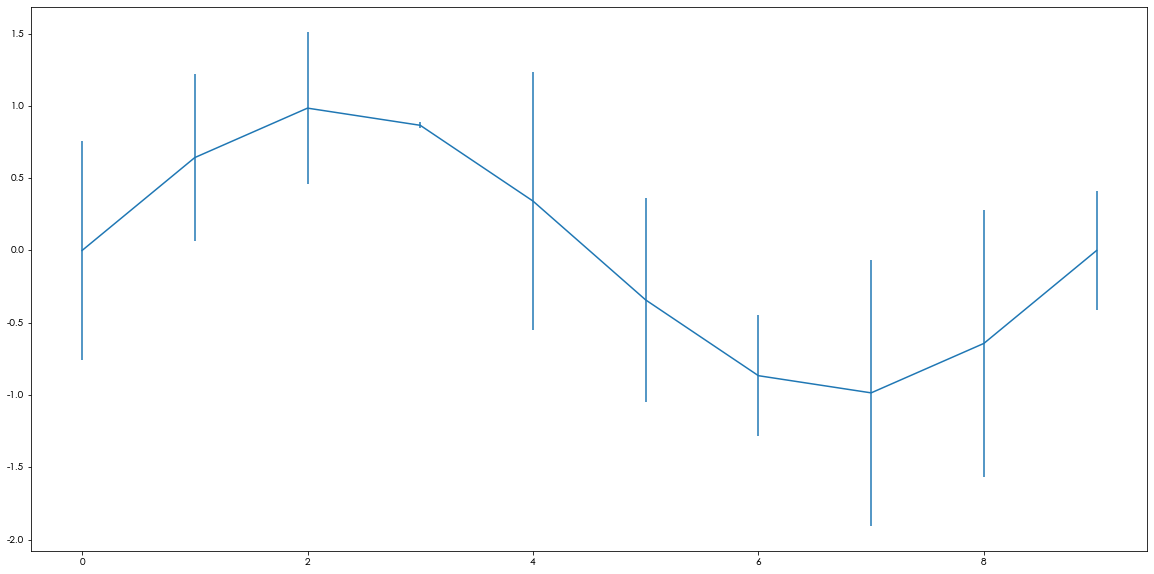

In [159]:
error=np.random.randn(10)
y=pd.Series(np.sin(np.linspace(0,np.pi*2,10)))
y.plot(yerr=error)
plt.show()